In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import xlrd
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import math
%matplotlib inline

plt.rc('figure', figsize=(10,6))
def plotDist(x,func,title,l,xlabel,ylabel):
    #plotfuncforelementsofx
    plt.plot(x,func,'b--',lw=2,alpha=0.6,label=l)
    xl=plt.gca().get_xlim()
    #linesonY−axis
    plt.hlines(0,xl[0],xl[1],linestyles='--',colors='#999999')
    plt.gca().set_xlim(xl)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotHistDist(func,x,r,title,l,xlabel,ylabel):
    plt.hist(r,normed=True,histtype='stepfilled',alpha=0.2)
    plotDist(x,func,title,l,xlabel,ylabel)


(a) Load the data in a DataFrame and perform any pre-processing as necessary.

In [3]:
crash = pd.read_excel('CRASH.XLS')
crash = crash[['MAKE', 'WEIGHT', 'DRIVHEAD','PASSHEAD']]
crash.head(10)

,MAKE,WEIGHT,DRIVHEAD,PASSHEAD
0,Geo,1986,467,186
1,Ford,2086,487,720
2,Honda,2313,375,531
3,Honda,2337,480,329
4,Mazda,2312,710,672
5,Nissan,2454,583,599
6,Toyota,2474,632,655
7,Toyota,2176,907,561
8,Buick,2935,626,372
9,Chrysler,2952,408,277


(b) Assume that the data population has a normal distribution, where the mean and standard
deviation are the same as the mean and standard deviation of the data in the column.
Using plotHistDist function to plot both the histogram of the column and a normal
distribution with the same mean and standard deviation in the same figure, and verify
that the data is approximately normally distributed.

/home/julian/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


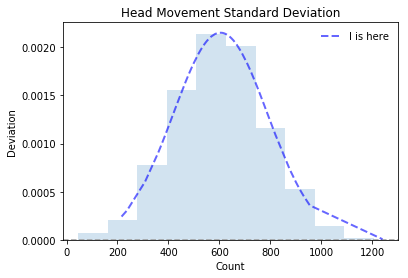

In [4]:
mu = crash['DRIVHEAD'].mean()
sigma = crash['DRIVHEAD'].std()
x = list(sorted(crash['DRIVHEAD']))
randvar = norm(mu, sigma)
r = norm.rvs(loc=mu, scale=sigma, size=1000)
plotHistDist(randvar.pdf(x),x,r,'Head Movement Standard Deviation',"l is here","Count","Deviation")


    (c) A crash-tested car is selected at random and the head injury rating is observed.
    i. Find the probability that the rating is between 500 and 700.
    ii. Find the probability that the rating is between 400 and 500.
    iii. Find the probability that the rating is less than 850.
    iv. Find the probability that the rating is greater than 1000.
    v. What rating will be exceeded by only 10% of tested cars?

In [5]:
cum_dist_500 = (randvar.cdf(700) - randvar.cdf(500))
cum_dist_400 = (randvar.cdf(500) - randvar.cdf(400))
cum_dist_850 = (randvar.cdf(850))
cum_dist_1000 = (1-randvar.cdf(1000))
print("Probability that the rating is between {} and {} is {:.3f}".format(500, 700, cum_dist_500))
print("Probability that the rating is between {} and {} is {:.3f}".format(500, 400, cum_dist_400))
print("Probability that the rating is less than {} is {:.3f}".format(850, cum_dist_850))
print("Probability that the rating is greater than {} is {:.3f}".format(1000, cum_dist_1000))
print("{}% of the cars that exceed the rating is {:3f}".format(10, randvar.ppf(0.1)))

Probability that the rating is between 500 and 700 is 0.410
Probability that the rating is between 500 and 400 is 0.152
Probability that the rating is less than 850 is 0.908
Probability that the rating is greater than 1000 is 0.016
10% of the cars that exceed the rating is 366.195336


[12] A department has 26 faculty members. For i = 0, 1, 2, 3, find pi
the probability that i of
them were born on the Christmas Day. Assume that the birth rates are constant throughout
the year and that each year has 365 days. Write Python code to find piassuming
(a) A binomial distribution.
(b) A Poisson distribution (which approximates the binomial distribution)

In [37]:
n = 26
p = 1/365
x = np.arange(0, 27)
randvar = binom(n,p)
l = "n = {}, p = {}".format(n,p)
#plotDist(x, randvar.pmf(x), 'binominal birthday', l, "x","y")
rv = binom(100, 20)
rv.ppf(np.arange(0,2))

array([-1., nan])

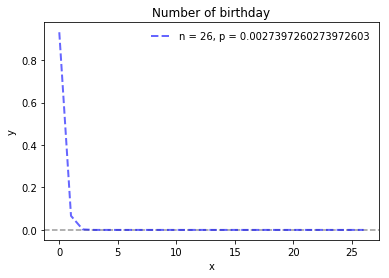

In [38]:
mu = n*p
randvar = poisson(mu)
plotDist(x, randvar.pmf(x), 'Number of birthday', l, "x","y")